# K-means clustering

## import library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [4]:
fname_data = 'C:/Users/heji0/OneDrive/문서/2021-1/머신러닝/11/assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

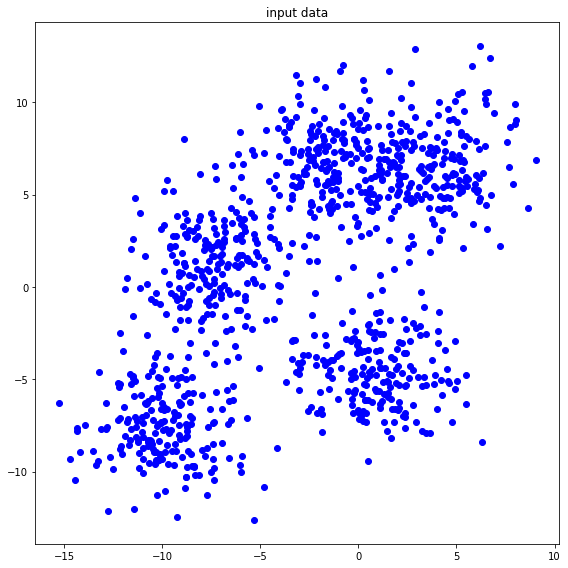

In [5]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y, 'o', color = 'blue')

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [17]:
def compute_distance(feature, center):
    distance = (feature-center)**2
    distance = np.sum(distance, axis=1)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [22]:
def compute_centroid(feature, label_feature, value_label):
    index = np.where(label_feature == value_label)
    cluster = feature[index]
    centroid = np.mean(cluster, axis = 0)
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [23]:
def compute_label(distance):
    index_label_feature = np.argmin(distance, axis=0)
    return index_label_feature


In [24]:
# ===================================================
# assign the number of clusters and iterations
number_cluster_5      = 5
number_iteration_5    = 15
number_cluster_10     = 10
number_iteration_10   = 35
# ===================================================

In [27]:
distance_5            = np.zeros(shape=(number_cluster_5, number_data))
centroid_5            = np.zeros(shape=(number_cluster_5, number_feature))
label_5 = np.zeros(number_data)
loss_iteration_5      = np.zeros(shape=(number_iteration_5, 1))
centroid_iteration_5  = np.zeros(shape=(number_iteration_5, number_cluster_5, number_feature))

np.random.seed(76923)
random = np.random.choice(number_data, number_cluster_5, replace=False)
centroid_5 = feature[random]

for i in range(number_iteration_5):
    
    for k in range(number_cluster_5):
        distance_5[k] = compute_distance(feature, centroid_5[k])
    label = compute_label(distance_5)
    a = 0
    for j in range(number_cluster_5):
        clustera = feature[np.where(label == j)]
        distancea_5 = compute_distance(clustera, centroid_5[j])
        b = np.sum(distancea_5)
        a = a+b
        avg_ = np.mean(clustera, axis=0)
        centroid_5[j] = avg_
    loss = a/number_data
    loss_iteration_5[i] = loss
    centroid_iteration_5[i] = centroid_5

    print("iteration = %4d, loss = %5.5f" % (i, loss))
    label_5 = label

iteration =    0, loss = 43.38177
iteration =    1, loss = 12.30193
iteration =    2, loss = 8.62519
iteration =    3, loss = 7.92625
iteration =    4, loss = 7.78785
iteration =    5, loss = 7.71393
iteration =    6, loss = 7.69314
iteration =    7, loss = 7.68463
iteration =    8, loss = 7.68395
iteration =    9, loss = 7.68354
iteration =   10, loss = 7.68054
iteration =   11, loss = 7.67835
iteration =   12, loss = 7.67764
iteration =   13, loss = 7.67764
iteration =   14, loss = 7.67764


In [29]:
distance_10            = np.zeros(shape=(number_cluster_10, number_data))
centroid_10            = np.zeros(shape=(number_cluster_10, number_feature))
label_10 = np.zeros(number_data)
loss_iteration_10      = np.zeros(shape=(number_iteration_10, 1))
centroid_iteration_10  = np.zeros(shape=(number_iteration_10, number_cluster_10, number_feature))

np.random.seed(76923)
random = np.random.choice(number_data, number_cluster_10, replace=False)
centroid_10 = feature[random]

for i in range(number_iteration_10):
    
    for k in range(number_cluster_10):
        distance_10[k] = compute_distance(feature, centroid_10[k])
    label = compute_label(distance_10)
    a = 0
    for j in range(number_cluster_10):
        clustera = feature[np.where(label == j)]
        distancea_10 = compute_distance(clustera, centroid_10[j])
        b = np.sum(distancea_10)
        a = a+b
        avg_ = np.mean(clustera, axis=0)
        centroid_10[j] = avg_
    loss = a/number_data
    loss_iteration_10[i] = loss
    centroid_iteration_10[i] = centroid_10

    print("iteration = %4d, loss = %5.5f" % (i, loss))
    label_10 = label

iteration =    0, loss = 9.17319
iteration =    1, loss = 5.74242
iteration =    2, loss = 5.57589
iteration =    3, loss = 5.52641
iteration =    4, loss = 5.49280
iteration =    5, loss = 5.47941
iteration =    6, loss = 5.47333
iteration =    7, loss = 5.47055
iteration =    8, loss = 5.46479
iteration =    9, loss = 5.44774
iteration =   10, loss = 5.42583
iteration =   11, loss = 5.39505
iteration =   12, loss = 5.35585
iteration =   13, loss = 5.30616
iteration =   14, loss = 5.22963
iteration =   15, loss = 5.17917
iteration =   16, loss = 5.10304
iteration =   17, loss = 5.01125
iteration =   18, loss = 4.95144
iteration =   19, loss = 4.92361
iteration =   20, loss = 4.91254
iteration =   21, loss = 4.90076
iteration =   22, loss = 4.88544
iteration =   23, loss = 4.87150
iteration =   24, loss = 4.86419
iteration =   25, loss = 4.86081
iteration =   26, loss = 4.85659
iteration =   27, loss = 4.85511
iteration =   28, loss = 4.85479
iteration =   29, loss = 4.85467
iteration 

## plot the results

In [35]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')

    plt.plot(x, y, 'o', color = 'blue')

    plt.tight_layout()
    plt.show()

In [36]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    
    n = len(loss_iteration)
    iteration = []
    for i in range(0,n):
        iteration.append(i)

    plt.plot(iteration, loss_iteration, '-', color = 'red')

    plt.tight_layout()
    plt.show()

In [59]:

def plot_centroid(centroid_iteration, cluster_n):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    iteration = []
    x = []
    y = []
    xx = []
    yy = []

    for i in range(0, len(centroid_iteration)):
        iteration.append(i)

    for i in range(0, cluster_n):
        for j in range(0, np.shape(centroid_iteration)[0]):
            xx.append(centroid_iteration[j][i][0])
            yy.append(centroid_iteration[j][i][1])
        x.append(xx)
        y.append(yy)
        xx=[]
        yy=[]

    x = np.array(x)
    y = np.array(y)

    for i in range(0,cluster_n):
        plt.plot(x[i],y[i],'-',label='cluster={}'.format(i))
        plt.legend()
    legend_flag=0

    for i in range(0, cluster_n):
        plt.plot(centroid_iteration[0][i][0], centroid_iteration[0][i][1], 'o', color='blue', label = 'initial')
        plt.plot(centroid_iteration[-1][i][0], centroid_iteration[-1][i][1], 's', color='red', label = 'final')
        if legend_flag==0:
            plt.legend()
            legend_flag=1

    plt.tight_layout()
    plt.show()

In [102]:
def plot_cluster(feature, label_feature, number_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    plt.scatter(feature[:,0],feature[:,1],c=label_feature,marker='o',cmap=plt.cm.get_cmap('rainbow', 6))
    plt.colorbar(ticks=range(number_cluster),format='%d', label='cluster')
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

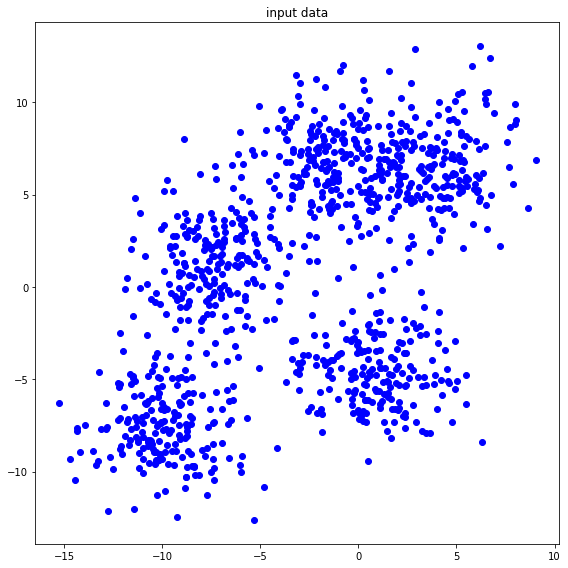

In [103]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

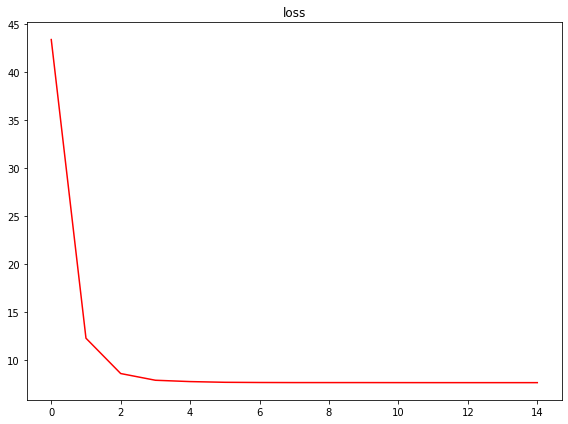

In [104]:
plot_loss_curve(loss_iteration_5)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

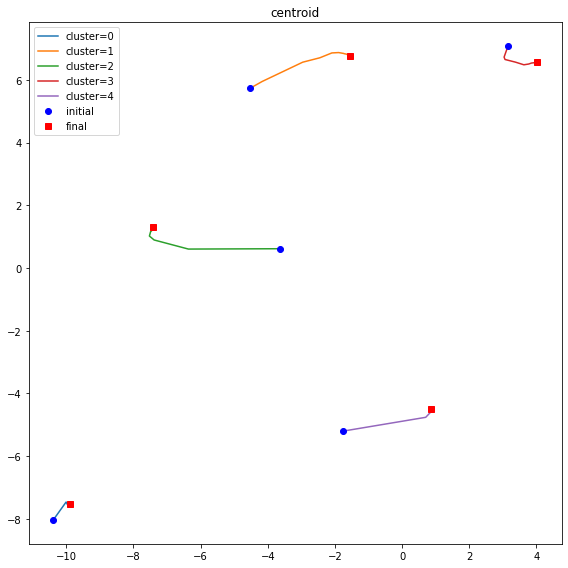

In [105]:
plot_centroid(centroid_iteration_5, number_cluster_5)

***

4. plot the final clustering result with the number of clusters being 5

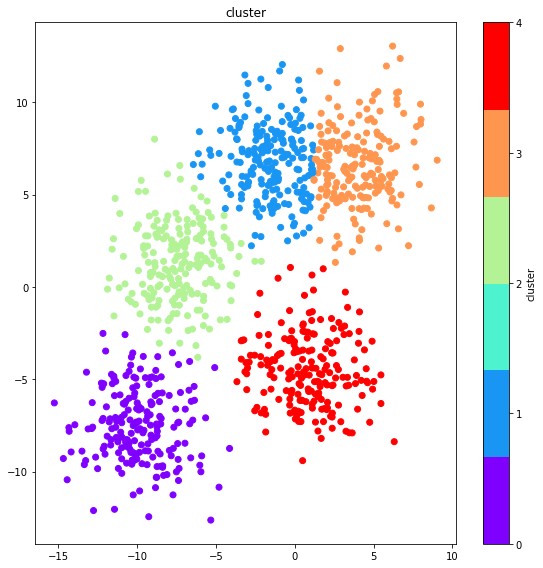

In [106]:
plot_cluster(feature, label_5, number_cluster_5)

***

5. plot the loss over the iterations with the number of clusters being 10

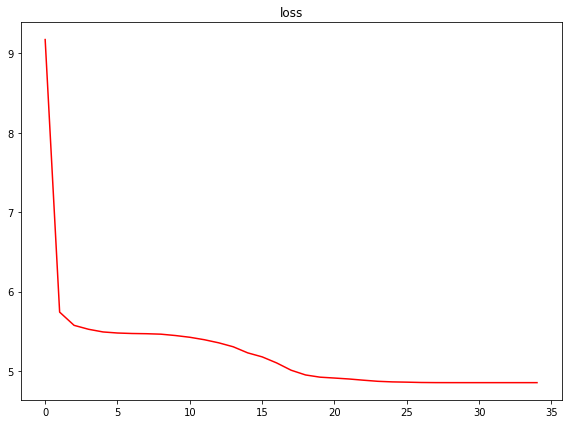

In [108]:
plot_loss_curve(loss_iteration_10)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

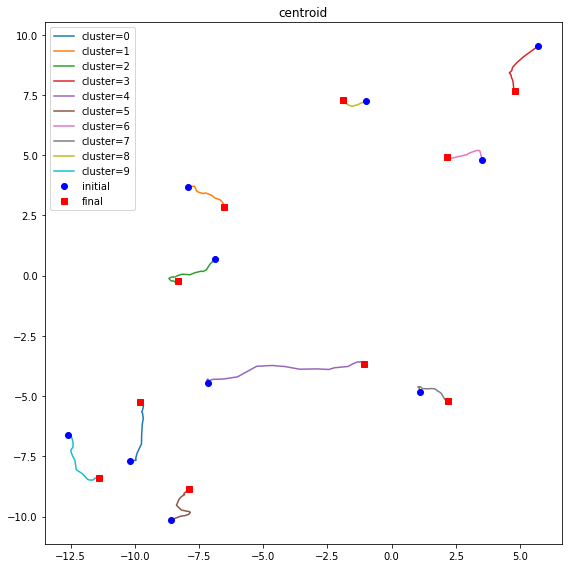

In [109]:
plot_centroid(centroid_iteration_10, number_cluster_10)

***

7. plot the final clustering result with the number of clusters being 10

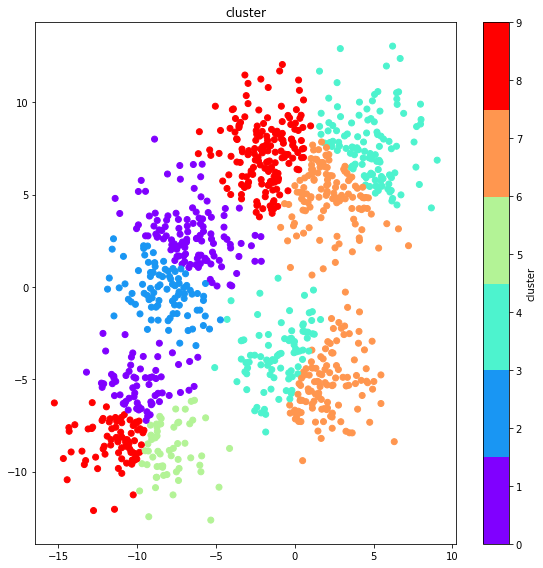

In [110]:
plot_cluster(feature, label_10, number_cluster_10)

***